### Collect Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Load Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [165]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel('Online_Retail.xlsx')

Check dataset details

In [6]:
df.shape

(541909, 8)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Remove missing values from the dataset

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(406829, 8)

In [11]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Explore & Visualize Dataset

Number of Unique customers

In [12]:
len(df.CustomerID.unique())

4372

Geograhic information

In [13]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

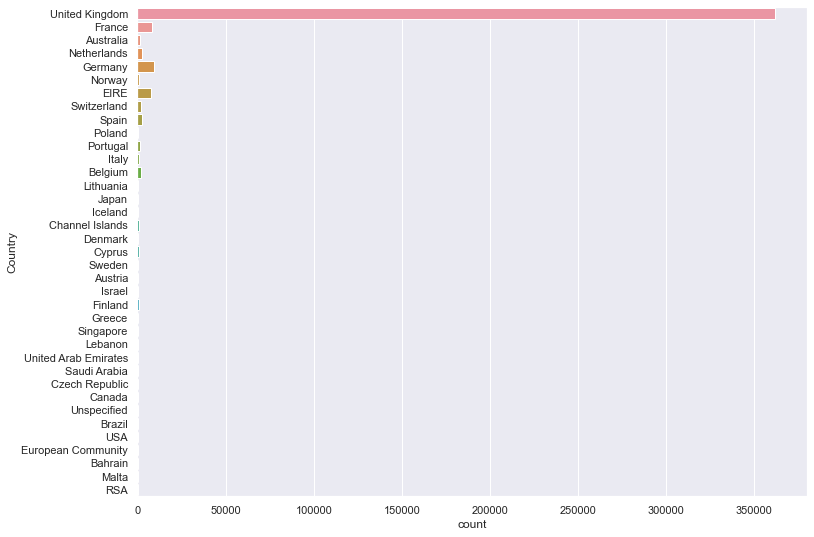

In [15]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(y='Country', data=df)

Lets remove Non-UK records as enough Geographic details about other countries/region is not available.

In [16]:
df = df[df.Country.isin(['United Kingdom'])]

In [17]:
df.shape

(361878, 8)

In [18]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

Number of Unique Products

In [19]:
len(df.StockCode.unique())

3661

Invoice Date Range

In [20]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

### Remove Invoices for 'Returns'

Number of Returned invoices

In [21]:
df.InvoiceNo.str.startswith('C').sum()

7533

Remove these invoices from the dataset

In [22]:
df = df[~df.InvoiceNo.str.startswith('C').fillna(False)]

In [23]:
df.shape

(354345, 8)

### Build a Customer Dataset

In [24]:
cust_df = pd.DataFrame(df.CustomerID.unique(), columns=['CustomerID'])

In [25]:
cust_df.columns

Index(['CustomerID'], dtype='object')

### Recency of Purchase

In [26]:
df['Recency'] = (pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days   ##Subtracting from the last date.

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


In [28]:
recency_df = df.groupby('CustomerID', as_index=False).agg({'Recency':'min'})      ## To Find the no. of customers with their latest buy.

In [29]:
recency_df.shape

(3921, 2)

In [30]:
cust_df = cust_df.merge(recency_df, left_on='CustomerID', right_on='CustomerID')

In [31]:
cust_df.shape

(3921, 2)

In [32]:
cust_df

,CustomerID,Recency
0,17850.0,372
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25
...,...,...
3916,15471.0,2
3917,13436.0,1
3918,15520.0,1
3919,13298.0,1


### Frequency of Invoices

In [33]:
frequency_df = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo':'count'})

In [34]:
frequency_df.shape

(3921, 2)

In [35]:
frequency_df

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59
...,...,...
3916,18280.0,10
3917,18281.0,7
3918,18282.0,12
3919,18283.0,756


In [36]:
cust_df = cust_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')

In [37]:
cust_df.shape

(3921, 3)

In [38]:
cust_df

,CustomerID,Recency,InvoiceNo
0,17850.0,372,297
1,13047.0,31,172
2,13748.0,95,28
3,15100.0,333,3
4,15291.0,25,103
...,...,...,...
3916,15471.0,2,77
3917,13436.0,1,12
3918,15520.0,1,18
3919,13298.0,1,2


### Monetary Value of Purchases

Calculate total purchase price for each invoice

In [39]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [40]:
monetary_df =  df.groupby('CustomerID', as_index=False).agg({'Sales':'sum'})

In [41]:
monetary_df

,CustomerID,Sales
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3916,18280.0,180.60
3917,18281.0,80.82
3918,18282.0,178.05
3919,18283.0,2094.88


In [42]:
cust_df = cust_df.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')

In [43]:
cust_df

,CustomerID,Recency,InvoiceNo,Sales
0,17850.0,372,297,5391.21
1,13047.0,31,172,3237.54
2,13748.0,95,28,948.25
3,15100.0,333,3,876.00
4,15291.0,25,103,4668.30
...,...,...,...,...
3916,15471.0,2,77,469.48
3917,13436.0,1,12,196.89
3918,15520.0,1,18,343.50
3919,13298.0,1,2,360.00


Here we are ready with the RFM dataset for the 3921 customers.

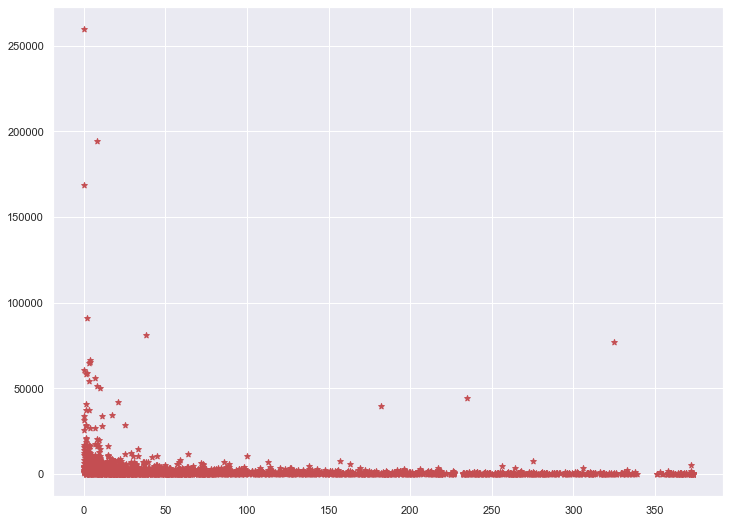

In [47]:
plt.scatter(cust_df.Recency,cust_df.Sales,marker='*',c='R')
plt.show()

It can be visualized that the customers that are recent are not always spend alot, But this can also be seen that the most spending customers are also Recent buyers.

In [48]:
## Let's Find out who are one time customer and who are returning customers.

In [72]:
cust_df['one-timer'] = cust_df.InvoiceNo

In [73]:
cust_df.head()

,CustomerID,Recency,InvoiceNo,Sales,one-timer
0,17850.0,372,297,5391.21,297
1,13047.0,31,172,3237.54,172
2,13748.0,95,28,948.25,28
3,15100.0,333,3,876.00,3
4,15291.0,25,103,4668.30,103


In [74]:
cust_df['one-timer'].value_counts()

6      73
1      71
10     70
9      70
5      67
       ..
538     1
524     1
516     1
512     1
720     1
Name: one-timer, Length: 443, dtype: int64

In [75]:
cust_df['one-timer'] = cust_df['one-timer'].map({1:'One-Time'})

In [85]:
cust_df['one-timer'].fillna('More than Once',inplace=True)

In [95]:
cust_df['Avg_Sales_per_invoice'] = cust_df.Sales/cust_df.InvoiceNo

In [96]:
cust_df

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice
0,17850.0,372,297,5391.21,More than Once,18.152222
1,13047.0,31,172,3237.54,More than Once,18.822907
2,13748.0,95,28,948.25,More than Once,33.866071
3,15100.0,333,3,876.00,More than Once,292.000000
4,15291.0,25,103,4668.30,More than Once,45.323301
...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,More than Once,6.097143
3917,13436.0,1,12,196.89,More than Once,16.407500
3918,15520.0,1,18,343.50,More than Once,19.083333
3919,13298.0,1,2,360.00,More than Once,180.000000


In [102]:
cust_df[cust_df.Avg_Sales_per_invoice == cust_df.Avg_Sales_per_invoice.max()]

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice
1002,12346.0,325,1,77183.6,One-Time,77183.6


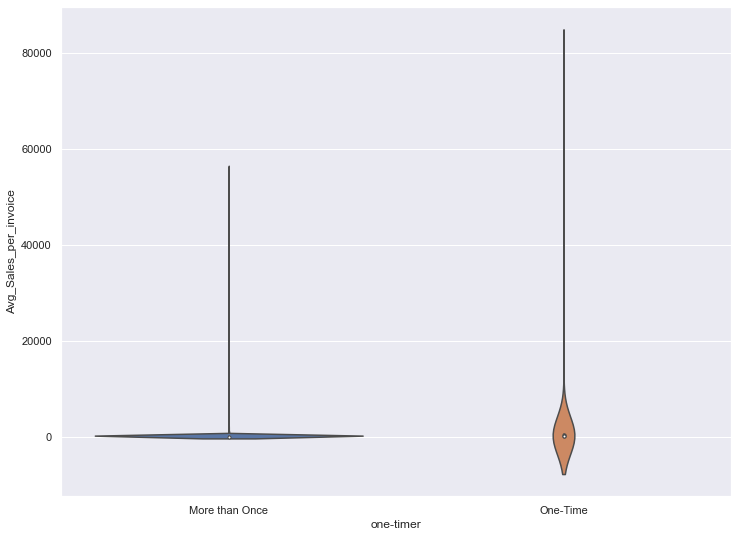

In [98]:
sns.violinplot(cust_df['one-timer'],cust_df.Avg_Sales_per_invoice)
plt.show()

In [103]:
rfm = cust_df.copy()

In [106]:
from scipy.stats import zscore

In [107]:
cust_df['one-timer'].value_counts()

More than Once    3850
One-Time            71
Name: one-timer, dtype: int64

In [109]:
rfm['one-timer'] = rfm['one-timer'].map({'One-Time':0,'More than Once':1})

In [111]:
rfm.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [112]:
pd.qcut(rfm['Recency'], [0,.25,.5,.75, 1],labels=['Highly_Active','Frequent','Temp_Idle','Inactive'])

0            Inactive
1            Frequent
2           Temp_Idle
3            Inactive
4            Frequent
            ...      
3916    Highly_Active
3917    Highly_Active
3918    Highly_Active
3919    Highly_Active
3920    Highly_Active
Name: Recency, Length: 3921, dtype: category
Categories (4, object): [Highly_Active < Frequent < Temp_Idle < Inactive]

In [114]:
rfm['Activity'] = pd.qcut(rfm['Recency'], [0,.25,.5,.75, 1],labels=['Highly_Active','Frequent','Temp_Idle','Inactive'])

In [115]:
rfm

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice,Activity
0,17850.0,372,297,5391.21,1,18.152222,Inactive
1,13047.0,31,172,3237.54,1,18.822907,Frequent
2,13748.0,95,28,948.25,1,33.866071,Temp_Idle
3,15100.0,333,3,876.00,1,292.000000,Inactive
4,15291.0,25,103,4668.30,1,45.323301,Frequent
...,...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,1,6.097143,Highly_Active
3917,13436.0,1,12,196.89,1,16.407500,Highly_Active
3918,15520.0,1,18,343.50,1,19.083333,Highly_Active
3919,13298.0,1,2,360.00,1,180.000000,Highly_Active


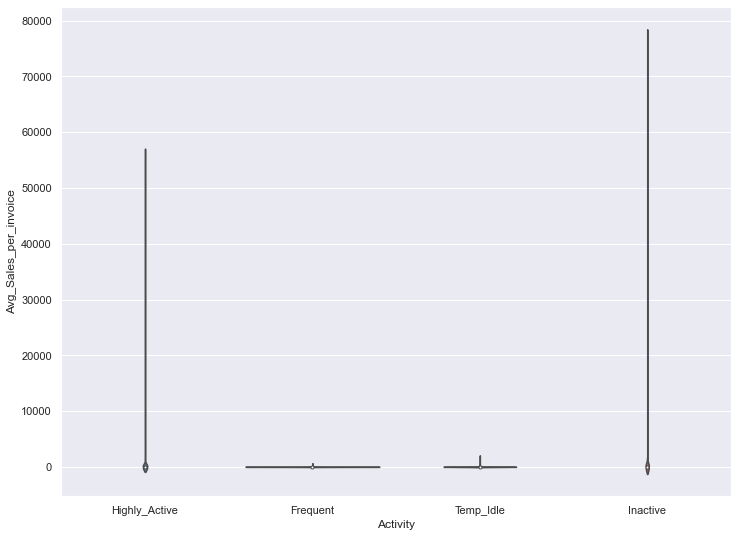

In [119]:
sns.violinplot(rfm.Activity,rfm.Avg_Sales_per_invoice)

In [120]:
rfm.Activity.value_counts()

Highly_Active    1004
Inactive          979
Temp_Idle         969
Frequent          969
Name: Activity, dtype: int64

The more focus should be on the Temp_Idle customers. They are the potential customers that we are losing.

In [124]:
rfm['R'] = pd.qcut(rfm['Recency'], [0,.2,.4,.6,.8, 1],labels=[5,4,3,2,1])

In [125]:
rfm['F'] = pd.qcut(rfm['InvoiceNo'], [0,.2,.4,.6,.8, 1],labels=[1,2,3,4,5])

In [126]:
rfm['M'] = pd.qcut(rfm['Sales'], [0,.2,.4,.6,.8, 1],labels=[1,2,3,4,5])

In [127]:
rfm

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice,Activity,R,F,M
0,17850.0,372,297,5391.21,1,18.152222,Inactive,1,5,5
1,13047.0,31,172,3237.54,1,18.822907,Frequent,4,5,5
2,13748.0,95,28,948.25,1,33.866071,Temp_Idle,2,2,4
3,15100.0,333,3,876.00,1,292.000000,Inactive,1,1,3
4,15291.0,25,103,4668.30,1,45.323301,Frequent,4,4,5
...,...,...,...,...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,1,6.097143,Highly_Active,5,4,3
3917,13436.0,1,12,196.89,1,16.407500,Highly_Active,5,1,1
3918,15520.0,1,18,343.50,1,19.083333,Highly_Active,5,2,2
3919,13298.0,1,2,360.00,1,180.000000,Highly_Active,5,1,2


In [134]:
rfm['One_timer'] = rfm['one-timer'].map({0:'One-time',1:'More than one'})

In [142]:
rfm

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice,Activity,R,F,M,Score
0,17850.0,372,297,5391.21,More than one,18.152222,Inactive,1,5,5,11
1,13047.0,31,172,3237.54,More than one,18.822907,Frequent,4,5,5,14
2,13748.0,95,28,948.25,More than one,33.866071,Temp_Idle,2,2,4,8
3,15100.0,333,3,876.00,More than one,292.000000,Inactive,1,1,3,5
4,15291.0,25,103,4668.30,More than one,45.323301,Frequent,4,4,5,13
...,...,...,...,...,...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,More than one,6.097143,Highly_Active,5,4,3,12
3917,13436.0,1,12,196.89,More than one,16.407500,Highly_Active,5,1,1,7
3918,15520.0,1,18,343.50,More than one,19.083333,Highly_Active,5,2,2,9
3919,13298.0,1,2,360.00,More than one,180.000000,Highly_Active,5,1,2,8


In [131]:
rfm['Score'] = rfm.R.astype('int64')+rfm.F.astype('int64')+rfm.M.astype('int64')

In [133]:
rfm['Score'].value_counts()

6     354
7     342
5     338
9     336
8     335
10    316
12    300
11    295
15    283
13    280
14    270
4     239
3     233
Name: Score, dtype: int64

## Score distribution : 3-6 : Bronze ; 6-9 : Silver; 9-12 : Gold; 12-15 : Diamond

The Main focus should be on the customers that are in Silver category, as they are potential customers which could be shifted to gold category.

In [143]:
rfm.Score.describe()

count    3921.000000
mean        8.986738
std         3.581176
min         3.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        15.000000
Name: Score, dtype: float64

In [146]:
rfm['Cust_type'] = pd.qcut(rfm.Score,[0,0.25,0.5,0.75,1],labels=['Bronze','Silver','Gold','Diamond'])

In [147]:
rfm

,CustomerID,Recency,InvoiceNo,Sales,one-timer,Avg_Sales_per_invoice,Activity,R,F,M,Score,Cust_type
0,17850.0,372,297,5391.21,More than one,18.152222,Inactive,1,5,5,11,Gold
1,13047.0,31,172,3237.54,More than one,18.822907,Frequent,4,5,5,14,Diamond
2,13748.0,95,28,948.25,More than one,33.866071,Temp_Idle,2,2,4,8,Silver
3,15100.0,333,3,876.00,More than one,292.000000,Inactive,1,1,3,5,Bronze
4,15291.0,25,103,4668.30,More than one,45.323301,Frequent,4,4,5,13,Diamond
...,...,...,...,...,...,...,...,...,...,...,...,...
3916,15471.0,2,77,469.48,More than one,6.097143,Highly_Active,5,4,3,12,Gold
3917,13436.0,1,12,196.89,More than one,16.407500,Highly_Active,5,1,1,7,Silver
3918,15520.0,1,18,343.50,More than one,19.083333,Highly_Active,5,2,2,9,Silver
3919,13298.0,1,2,360.00,More than one,180.000000,Highly_Active,5,1,2,8,Silver


## Thank-You